# Pixelated Metrics - Logins combined

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
plt.style.use('ggplot')

In [2]:
def get_run(users, emails, run_number):
    filename = '{}users-{}emails-{}.txt'.format(users, emails, run_number)
    run = {}
    with open(filename) as f:
        for line in f:
            key, value = line.split()
            value = float(value)
            run.setdefault(key, []).append(value)
    return run

def get_median_run(users):
    login_metric = 'login-leap-session'
    aggregate_run = []
    for run_number in range(3, 10):
        single_run = get_run(users, 0, run_number)
        aggregate_run.append(single_run)

    sorted_aggregate_run = sorted(aggregate_run, key=lambda run: np.median(run[login_metric]))
    
    median_run = sorted_aggregate_run[3]
    return median_run

In [3]:
metrics = {}
for users in [1, 5, 10, 25, 50]:
    for key, value in get_run(users, 0, 1).items():
        metrics.setdefault(key, []).append(np.median(value))

**The tests with 50 users have 3 more metrics that we need to remove so we can plot the graphic.**

**We should fix this later**

In [4]:
for key, value in metrics.items():
    if len(value) == 1:
        print key
        del metrics[key]

sync-soledad-get-remote-state
sync-leap-mail-recurrent
sync-soledad-diff-docs


In [5]:
def plot_logins(metrics, filename, omit_tiny_metrics=False):
    plt.figure()
    plt.ylabel('Seconds')
    plt.xlabel('Users')
    plt.xticks((1, 5, 10, 25, 50))
    
    max_value = max([max(value) for key, value in metrics.items()])
    for key, value in metrics.items():
        if not omit_tiny_metrics or max(value) > max_value/10:
            plt.plot([1, 5, 10, 25, 50], value, label=key)    

    plt.legend(bbox_to_anchor=(1.05, 1), loc='best', borderaxespad=0.)
    plt.savefig(filename + '.pdf', bbox_inches='tight')
    plt.savefig(filename + '.png', bbox_inches='tight')

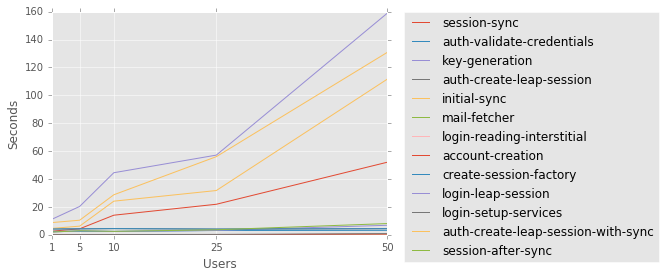

In [6]:
plot_logins(metrics, 'figures/logins-combined', omit_tiny_metrics=False)

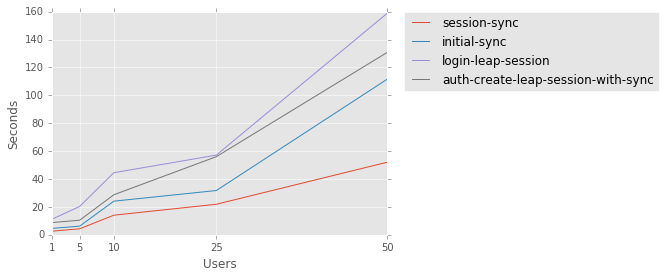

In [7]:
plot_logins(metrics, 'figures/logins-combined-2',omit_tiny_metrics=True)